# Вероятностная классификация

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('students.csv')
df_cut = df[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number']].dropna()

df_test = pd.read_csv('students_test.csv')
df_test_cut = df_test[['Growth', 'Weight', 'Sex', 'Hair length', 'Children number']].dropna()

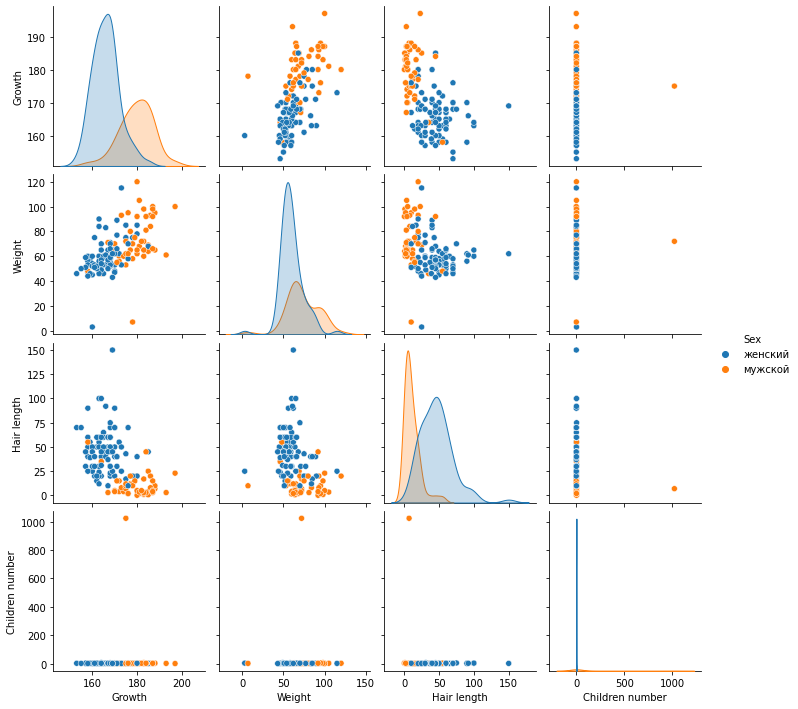

In [3]:
sns.pairplot(df_cut, hue='Sex')

In [4]:
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(df_cut[['Growth', 'Weight', 'Hair length', 'Children number']],
          y=df_cut['Sex'])

RandomForestClassifier(max_depth=2, random_state=0)

In [6]:
proba = model.predict_proba(df_test_cut[['Growth', 'Weight', 'Hair length', 'Children number']])
proba

array([[0.1119842 , 0.8880158 ],
       [0.96095378, 0.03904622],
       [0.9303843 , 0.0696157 ],
       [0.95480426, 0.04519574],
       [0.07229695, 0.92770305],
       [0.9592805 , 0.0407195 ],
       [0.95523625, 0.04476375],
       [0.1968501 , 0.8031499 ],
       [0.14498541, 0.85501459],
       [0.60529848, 0.39470152],
       [0.6819062 , 0.3180938 ],
       [0.1143206 , 0.8856794 ],
       [0.75407153, 0.24592847],
       [0.9592805 , 0.0407195 ],
       [0.96132415, 0.03867585],
       [0.10439874, 0.89560126],
       [0.15853126, 0.84146874],
       [0.05722533, 0.94277467],
       [0.95848145, 0.04151855],
       [0.09863631, 0.90136369],
       [0.09435884, 0.90564116],
       [0.09435884, 0.90564116],
       [0.13461655, 0.86538345],
       [0.96178712, 0.03821288],
       [0.90446726, 0.09553274],
       [0.70389532, 0.29610468],
       [0.09693027, 0.90306973],
       [0.13157186, 0.86842814],
       [0.90963642, 0.09036358],
       [0.96132415, 0.03867585],
       [0.

In [7]:
df_test_cut['pr class 0'] = proba[:, 0]
df_test_cut['pr class 1'] = proba[:, 1]
df_test_cut.head()

,Growth,Weight,Sex,Hair length,Children number,pr class 0,pr class 1
0,180.0,78.0,мужской,1.2,2.0,0.111984,0.888016
1,167.0,50.0,женский,30.0,2.0,0.960954,0.039046
3,156.0,47.0,женский,20.0,2.0,0.930384,0.069616
5,150.0,40.0,женский,30.0,2.0,0.954804,0.045196
7,183.0,80.0,мужской,2.0,0.0,0.072297,0.927703


In [8]:
# Мужчина, вероятность которого быть отнесенным к мужчинам по мнению модели,
# менее заданного порога
threshold = 0.5
df_test_cut[(df_test_cut['pr class 1'] < threshold) & (df_test_cut['Sex'] == 'мужской')]

,Growth,Weight,Sex,Hair length,Children number,pr class 0,pr class 1
78,175.0,50.0,мужской,40.0,2.0,0.707625,0.292375


In [9]:
# Объекты, отсортированные по "мужественности"
df_test_cut.sort_values(by='pr class 1').head(50)

,Growth,Weight,Sex,Hair length,Children number,pr class 0,pr class 1
52,160.0,50.0,женский,62.0,1.0,0.962526,0.037474
30,168.0,55.0,женский,30.0,2.0,0.961787,0.038213
20,165.0,57.0,женский,50.0,2.0,0.961324,0.038676
68,164.0,56.0,женский,50.0,2.0,0.961324,0.038676
39,157.0,49.0,женский,120.0,2.0,0.961324,0.038676
51,164.0,54.0,женский,50.0,2.0,0.961324,0.038676
42,161.0,55.0,женский,60.0,2.0,0.961324,0.038676
37,167.0,55.0,женский,50.0,2.0,0.961324,0.038676
88,158.0,50.0,женский,30.0,2.0,0.960954,0.039046
1,167.0,50.0,женский,30.0,2.0,0.960954,0.039046


In [10]:
# Названия классов моделей и их индексы
model.classes_ 

array(['женский', 'мужской'], dtype=object)